## Observations 

+ From the data displayed we can conclude each drug regiment was correctly analyzed because we have a maximum SEM of 0.603860 that belongs to Ketapril. This means the mean of each regimen is closer to the mean of all regimens.
+ In looking at the box and whiskers you can see there is no outliers. This implies we have a consistent behaviour of the tumor volume.
+ When analyzing a single mouse of Capomulin drug we see the tumor went from 45 mm^3 to less than 25 mm^3, also there is a large change from 0 to the 10 timepoint. Looking at this we can see the drug has a big influence on the tumor volume at the start of the test.
+ When applying the linear regression to the data Weight vs Average tumor we got a correlation factor(r^2) of 0.8419, this is an excellent indicator there is a strong relation between the weight of the mouse and the avg tumor volume.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random
from scipy.stats import sem
import scipy.stats as st
from sklearn import datasets
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
#print(f"{mouse_metadata.head()}")
#print(f"{study_results.head()}")
# Combine the data into a single dataset
MS=pd.merge(mouse_metadata,study_results,on="Mouse ID")

In [2]:
MS

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each DRUG regimen
pd.DataFrame({
    "Mean":MS.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
    "Median":MS.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
    "Variance":MS.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
    "Standard Deviation":MS.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
    "SEM":MS.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
})

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

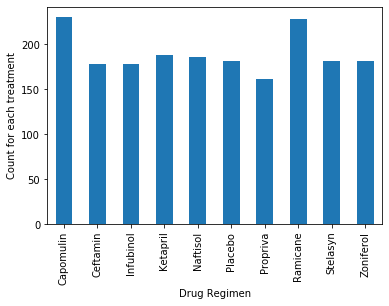

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
DataPoints=MS.groupby("Drug Regimen")["Drug Regimen"].count()
BarPandas=DataPoints.plot.bar()
BarPandas.set_ylabel("Count for each treatment")
plt.show()

In [5]:
DF=pd.DataFrame(DataPoints)
DFnumpy=DF["Drug Regimen"].to_numpy()

In [6]:
DR=MS["Drug Regimen"].unique()

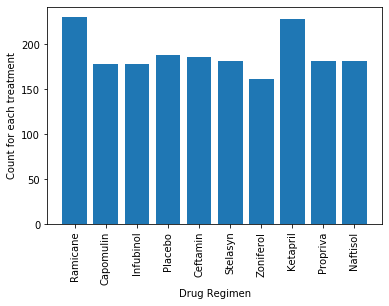

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen usin
MS["Drug Regimen"].unique()
plt.bar(DR,DFnumpy)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Count for each treatment")
plt.show()

## Pie plots

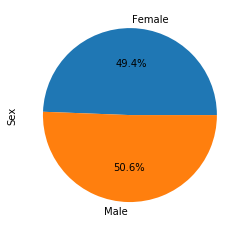

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
SexDist=MS.groupby("Sex")["Sex"].count()
PiePa=SexDist.plot.pie(subplots=True,autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [9]:
#  Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#  Capomulin, Ramicane, Infubinol, and Ceftamin.
M=MS.set_index("Drug Regimen")
#  Capomulin
C=M.loc[["Capomulin"],["Tumor Volume (mm3)","Mouse ID","Timepoint"]]
Capomulin=C.query(f"Timepoint== 45")
qrtls = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = qrtls[0.25]
uq = qrtls[0.75]
iqr = uq-lq
print(f"The interquartile range for Capomulin is: {iqr}")
ld = lq - (1.5*iqr)
ud = uq + (1.5*iqr)
#  Ramicane
R=M.loc[["Ramicane"],["Tumor Volume (mm3)","Mouse ID","Timepoint"]]
Ramicane=R.query(f"Timepoint== 45")
qrtls1 = Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq1 = qrtls1[0.25]
uq1 = qrtls1[0.75]
iqr1 = uq1-lq1
print(f"The interquartile range for Ramicane is: {iqr1}")
ld1 = lq1 - (1.5*iqr1)
ud1 = uq1 + (1.5*iqr1)
#  Infubinol
I=M.loc[["Ramicane"],["Tumor Volume (mm3)","Mouse ID","Timepoint"]]
Infubinol=I.query(f"Timepoint== 45")
qrtls2 = Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq2= qrtls2[0.25]
uq2 = qrtls2[0.75]
iqr2 = uq2-lq2
print(f"The interquartile range for Infubinol is: {iqr2}")
ld2 = lq2 - (1.5*iqr2)
ud2 = uq2 + (1.5*iqr2)
#  Ceftamin
Ce=M.loc[["Ramicane"],["Tumor Volume (mm3)","Mouse ID","Timepoint"]]
Ceftamin=Ce.query(f"Timepoint== 45")
qrtls3 = Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq3= qrtls3[0.25]
uq3 = qrtls3[0.75]
iqr3 = uq3-lq3
print(f"The interquartile range for Ceftamin is: {iqr3}")
ld3 = lq3 - (1.5*iqr3)
ud3 = uq3 + (1.5*iqr3)

IQR=pd.DataFrame({
    "Capomulin":iqr,
    "Ramicane":iqr1,
    "Infubinol":iqr2,
    "Ceftamin":iqr3
},index=["IQR"])
IQR

The interquartile range for Capomulin is: 7.781863460000004
The interquartile range for Ramicane is: 7.527130082499998
The interquartile range for Infubinol is: 7.527130082499998
The interquartile range for Ceftamin is: 7.527130082499998


,Capomulin,Ramicane,Infubinol,Ceftamin
IQR,7.781863,7.52713,7.52713,7.52713


In [10]:
Outliers=Capomulin.loc[(Capomulin["Tumor Volume (mm3)"]<ld)|(Capomulin["Tumor Volume (mm3)"]>ud)]
print("There are no outliers for Capomulin")
print(f"{Outliers}")

Outliers1=Ramicane.loc[(Ramicane["Tumor Volume (mm3)"]<ld)|(Ramicane["Tumor Volume (mm3)"]>ud)]
print("There are no outliers for Ramicane")
print(f"{Outliers1}")

Outliers2=Infubinol.loc[(Infubinol["Tumor Volume (mm3)"]<ld)|(Infubinol["Tumor Volume (mm3)"]>ud)]
print("There are no outliers for Infubinol")
print(f"{Outliers2}")

Outliers3=Ceftamin.loc[(Ceftamin["Tumor Volume (mm3)"]<ld)|(Ceftamin["Tumor Volume (mm3)"]>ud)]
print("There are no outliers for Ceftamin")
print(f"{Outliers3}")

There are no outliers for Capomulin
Empty DataFrame
Columns: [Tumor Volume (mm3), Mouse ID, Timepoint]
Index: []
There are no outliers for Ramicane
Empty DataFrame
Columns: [Tumor Volume (mm3), Mouse ID, Timepoint]
Index: []
There are no outliers for Infubinol
Empty DataFrame
Columns: [Tumor Volume (mm3), Mouse ID, Timepoint]
Index: []
There are no outliers for Ceftamin
Empty DataFrame
Columns: [Tumor Volume (mm3), Mouse ID, Timepoint]
Index: []


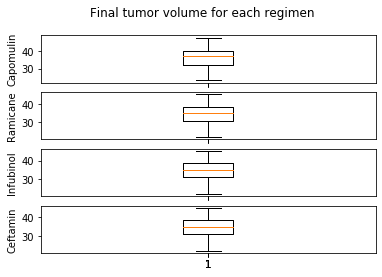

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(4,sharex=True)

ax1.boxplot(Capomulin['Tumor Volume (mm3)'])
ax1.set_ylabel('Capomulin')

ax2.boxplot(Ramicane['Tumor Volume (mm3)'])
ax2.set_ylabel('Ramicane')

ax3.boxplot(Infubinol['Tumor Volume (mm3)'])
ax3.set_ylabel('Infubinol')

ax4.boxplot(Ceftamin['Tumor Volume (mm3)'])
ax4.set_ylabel('Ceftamin')

fig1.suptitle('Final tumor volume for each regimen') 
plt.show()

## Line and scatter plots

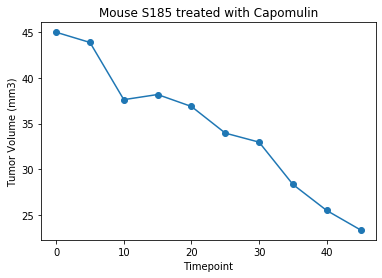

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
P=M.loc[["Capomulin"],["Tumor Volume (mm3)","Mouse ID","Timepoint"]]
L=P.set_index("Mouse ID")
SM=L.loc["s185"]
plt.plot(SM["Timepoint"],SM["Tumor Volume (mm3)"],marker="o")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse S185 treated with Capomulin")
plt.show()

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
MW=M.loc[["Capomulin"],["Tumor Volume (mm3)","Weight (g)","Mouse ID"]]
A=pd.DataFrame(MW.groupby("Mouse ID",as_index=False)["Tumor Volume (mm3)"].mean())
B=pd.DataFrame(MW.groupby("Mouse ID",as_index=False)["Weight (g)"].mean())
C=pd.merge(A,B,on="Mouse ID")

The correlation coefficient(R^2) is: 0.8419363424694718


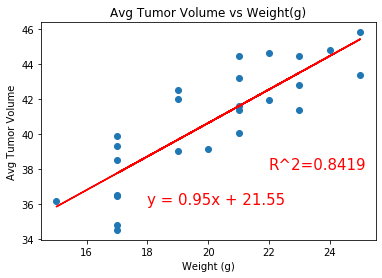

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = C["Weight (g)"]
y_values = C["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume')
plt.title("Avg Tumor Volume vs Weight(g)")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(22,38),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.show()